In [1]:
# EDA on Titanic Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Optional: Set visual style
sns.set(style='whitegrid')

In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\Pasul\OneDrive\Documents\Desktop\Titanic-Dataset.csv")

In [7]:
# Basic overview
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
df.info()

# View first few rows
df.head()

Shape of dataset: (891, 12)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### SUMMARY STATISTICS

In [8]:
# Descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check for null values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Check categorical values
print("\nUnique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Embarked':", df['Embarked'].unique())


Unique values in 'Sex': ['male' 'female']
Unique values in 'Embarked': ['S' 'C' 'Q' nan]


### Histograms of Numeric Features

Text(0.5, 0.98, 'Histogram of Numerical Features')

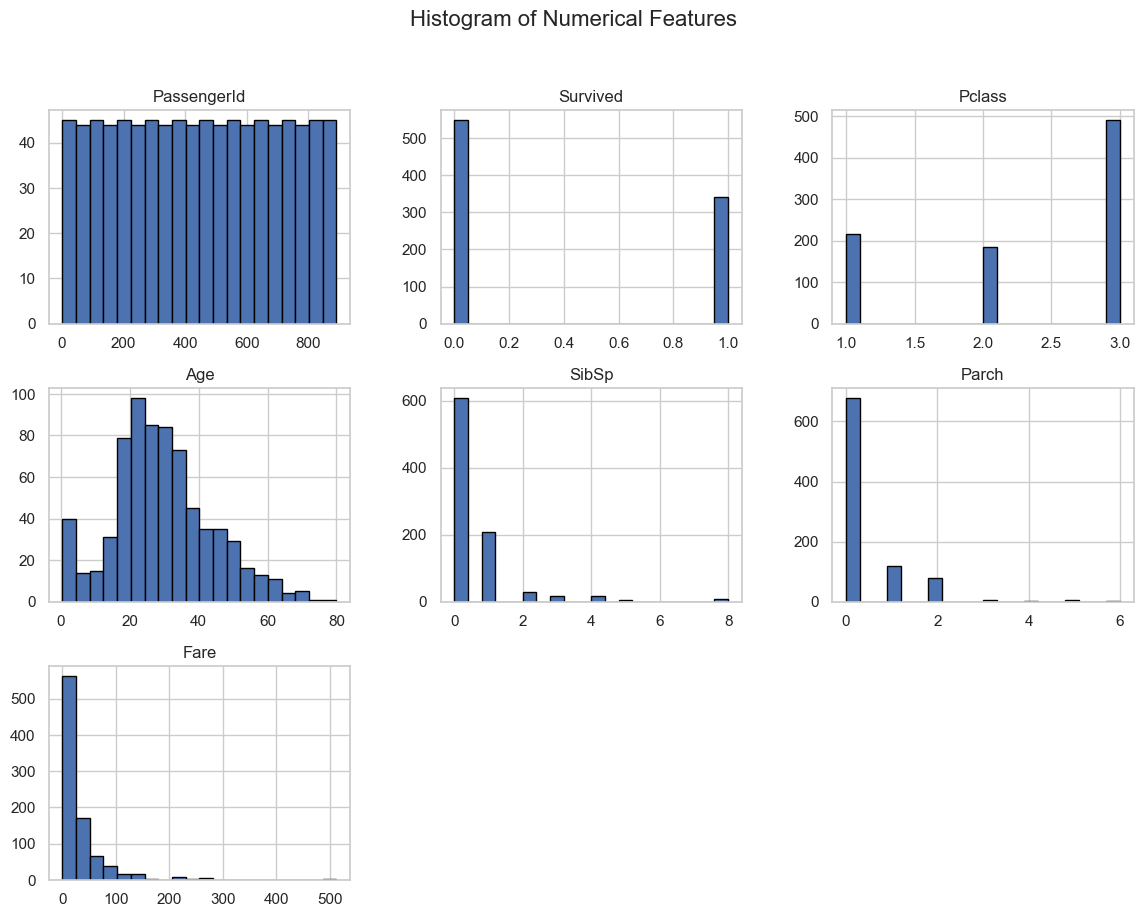

In [11]:
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)

In [12]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [13]:
plt.show()

### Boxplots to Detect Outliers

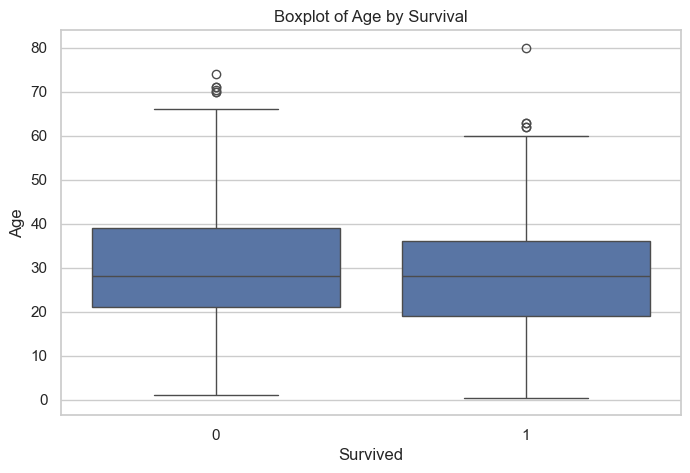

In [14]:
# Age vs Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Boxplot of Age by Survival")
plt.show()

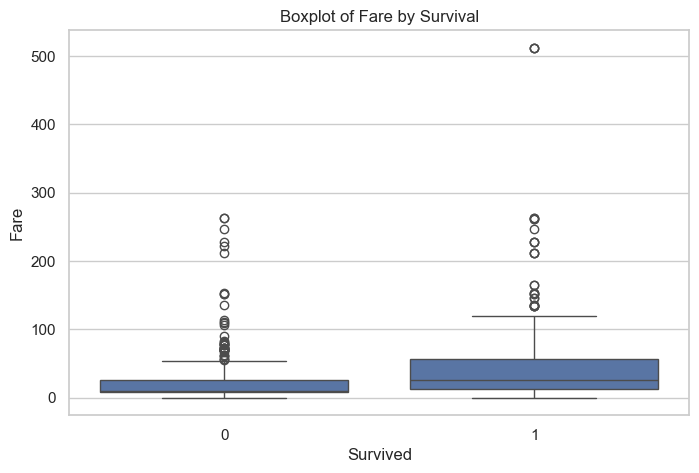

In [15]:
# Fare vs Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Boxplot of Fare by Survival")
plt.show()

### Correlation & Pairplot

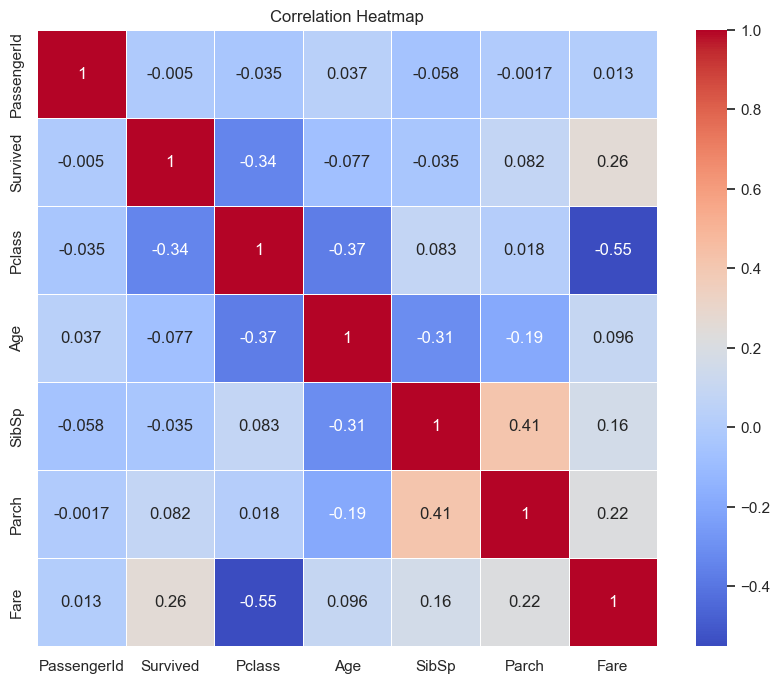

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

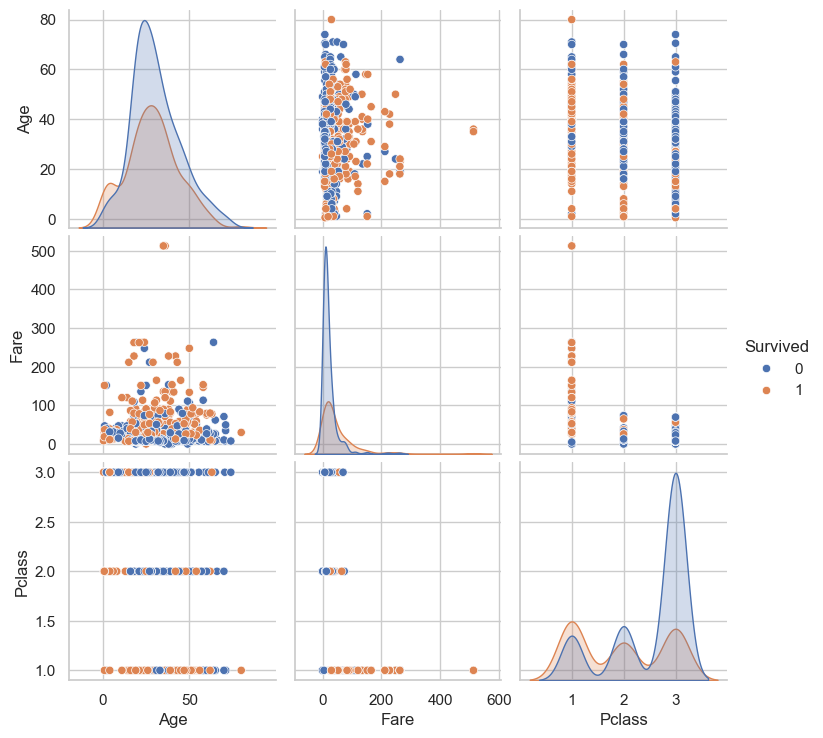

In [17]:
# Pairplot (optional subset to avoid clutter)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

###  Feature-Level Patterns

In [18]:
# Survival rate by sex
print("Survival rate by sex:")
print(df.groupby('Sex')['Survived'].mean())

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [19]:
# Survival rate by passenger class
print("\nSurvival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [20]:
# Survival rate by Embarked
print("\nSurvival rate by Embarked:")
print(df.groupby('Embarked')['Survived'].mean())


Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [22]:
# Average age of survivors vs non-survivors
print("\nAverage Age - Survived vs Not Survived:")
print(df.groupby('Survived')['Age'].mean())


Average Age - Survived vs Not Survived:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
